In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [3]:
def plot_TMA_EIDW():
    
    TMA_lon=[-5.5000, -5.5000, -5.5000, -5.5000, -5.5000, -6.6169, -6.8333, -7.3333, -7.3333, -6.7606, -5.5000];

    TMA_lat=[53.9167, 53.7672, 53.0975, 52.7594, 52.3333, 52.6139, 52.7594, 53.0908, 53.7522, 54.1619, 53.9167];
    
    # Runway 10R
    rwy10R_lon=[-6.290075, -6.250578];
    rwy10R_lat=[53.42243, 53.42026];

    # Runway 28L
    rwy28L_lon=[-6.250578, -6.290075];
    rwy28L_lat=[53.42026, 53.42243];

    # Runway 16
    rwy16_lon=[-6.261978, -6.249594];
    rwy16_lat=[53.43699, 53.41991];

    # Runway 34
    rwy34_lon=[6.249594, -6.261978];
    rwy34_lat=[53.41991, 53.43699];

    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy10R_lon, rwy10R_lat, color="red")
    plt.plot(rwy16_lon, rwy16_lat, color="red")
    
    # Entry Points
    ABLIN_lon = -4.9925
    ABLIN_lat =	52.7828
    BAGSO_lon = -5.5000
    BAGSO_lat =	53.6800
    BAMLI_lon = -6.6511
    BAMLI_lat =	54.1412
    BOYNE_lon = -5.5000
    BOYNE_lat =	53.7671
    BUNED_lon = -6.6301
    BUNED_lat =	52.6228
    LIPGO_lon = -5.5000
    LIPGO_lat =	53.0639
    NIMAT_lon = -5.7421
    NIMAT_lat =	53.9650
    OLAPO_lon = -7.2946
    OLAPO_lat =	53.7803
    OSGAR_lon = -7.2702
    OSGAR_lat =	53.0494
    SUTEX_lon = -6.9304
    SUTEX_lat =	52.8244
    VATRY_lon = -5.5000
    VATRY_lat =	52.5544

    plt.plot(ABLIN_lon, ABLIN_lat, 'ro')
    plt.plot(BAGSO_lon, BAGSO_lat, 'ro')
    plt.plot(BAMLI_lon, BAMLI_lat, 'ro')
    plt.plot(BOYNE_lon, BOYNE_lat, 'ro')
    plt.plot(BUNED_lon, BUNED_lat, 'ro')
    plt.plot(LIPGO_lon, LIPGO_lat, 'ro')
    plt.plot(NIMAT_lon, NIMAT_lat, 'ro')
    plt.plot(OLAPO_lon, OLAPO_lat, 'ro')
    plt.plot(OSGAR_lon, OSGAR_lat, 'ro')
    plt.plot(SUTEX_lon, SUTEX_lat, 'ro')
    plt.plot(VATRY_lon, VATRY_lat, 'ro')
    
    rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
    rwy28L_around_lat=[53.37, 53.47, 53.47, 53.37, 53.37];
    
    plt.plot(rwy28L_around_lon, rwy28L_around_lat)

In [4]:
 def plot_horizontal_profile_EIDW(df, runway, linewidth):
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = 53.25
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_EIDW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        for seq, row in flight_states_opensky_df.groupby(level='sequence'):
        
            if row['lon'].item() != 0:
                lon.append(row['lon'].item())
            if row['lat'].item() != 0:
                lat.append(row['lat'].item())
            
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        plt.plot(lon, lat, color='k', linewidth=linewidth)
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)

In [5]:
def plot_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['altitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)


In [6]:
def plot_raw_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['rawAltitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [51]:
filename = "../data/EIDW/2019/osn_EIDW_states_TMA_after_filtering_2019/osn_EIDW_states_TMA_2019_10_week1.csv"
EIDW_states_2019_10_week1_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
EIDW_states_2019_10_week1_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/PIs/PIs_horizontal_by_flight_2019_10_week1.csv"
horizontal_PIs_df = pd.read_csv(filename, sep=' ')
horizontal_PIs_df.set_index(['flight_id'], inplace=True)

#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week1.csv"
#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week1_rwy28R.csv"
#vertical_PIs_by_flight_df = pd.read_csv(filename, sep=' ')

#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week1.csv"
#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week1_rwy28R.csv"
#vertical_PIs_by_hour_df = pd.read_csv(filename, sep=' ')

In [49]:
filename = "../data/EIDW/2019/osn_EIDW_states_TMA_after_filtering_2019/osn_EIDW_states_TMA_2019_10_week1_by_runways/osn_EIDW_states_TMA_2019_10_week1_rwy28.csv"
week1_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/osn_EIDW_states_TMA_after_filtering_2019/osn_EIDW_states_TMA_2019_10_week2_by_runways/osn_EIDW_states_TMA_2019_10_week2_rwy28.csv"
week2_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/osn_EIDW_states_TMA_after_filtering_2019/osn_EIDW_states_TMA_2019_10_week3_by_runways/osn_EIDW_states_TMA_2019_10_week3_rwy28.csv"
week3_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/osn_EIDW_states_TMA_after_filtering_2019/osn_EIDW_states_TMA_2019_10_week4_by_runways/osn_EIDW_states_TMA_2019_10_week4_rwy28.csv"
week4_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

In [58]:
filename = "../data/EIDW/2019/osn_EIDW_states_TMA_after_filtering_2019/osn_EIDW_states_TMA_2019_10_week1_by_entry_points_and_runways/osn_EIDW_states_TMA_2019_10_week1_NIMAT_rwy28.csv"
week1_NIMAT_rwy28_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_NIMAT_rwy28_df.set_index(['flight_id', 'sequence'], inplace = True)

In [53]:
df1 = week1_rwy28_df[week1_rwy28_df['date']==191001]
df2 = week1_rwy28_df[week1_rwy28_df['date']==191002]
df3 = week1_rwy28_df[week1_rwy28_df['date']==191003]
df4 = week1_rwy28_df[week1_rwy28_df['date']==191004]
df5 = week1_rwy28_df[week1_rwy28_df['date']==191005]
df6 = week1_rwy28_df[week1_rwy28_df['date']==191006]
df7 = week1_rwy28_df[week1_rwy28_df['date']==191007]

In [64]:
num = len(week1_NIMAT_rwy28_df.groupby(level='flight_id'))
print(num)

168


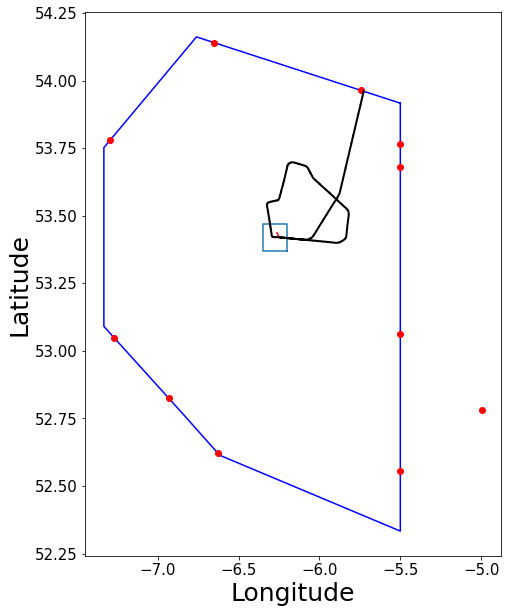

In [67]:
#for flight_id, flight_id_group in week1_NIMAT_rwy28_df.groupby(level='flight_id'):
    #plot_horizontal_profile_EIDW(flight_id_group, "x", 2)
    #print(flight_id)
#191001STK21GL
flight_df = week1_NIMAT_rwy28_df[week1_NIMAT_rwy28_df.index.get_level_values('flight_id') == '191001STK21GL']
plot_horizontal_profile_EIDW(flight_df, "x", 2)

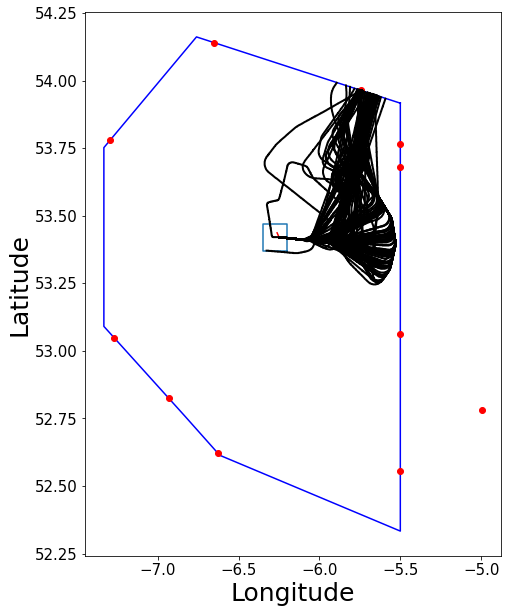

In [60]:
plot_horizontal_profile_EIDW(week1_NIMAT_rwy28_df, "x", 2)

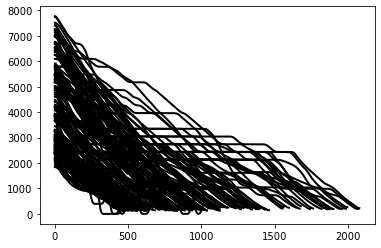

In [55]:
plot_vertical_profile(df1, 0, 2)

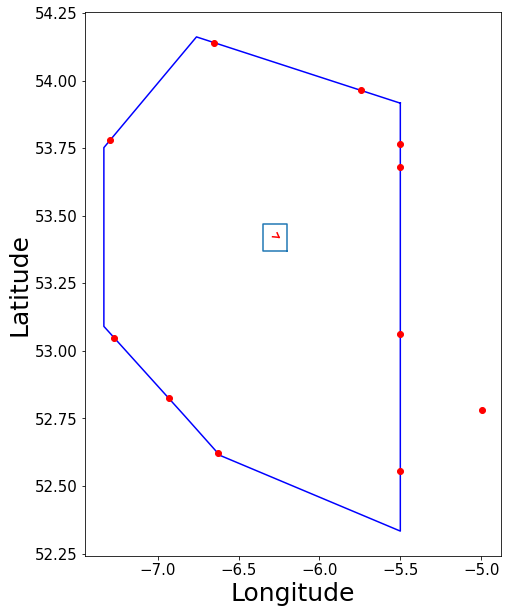

In [42]:
plot_horizontal_profile_EIDW(df2, "x", 2)

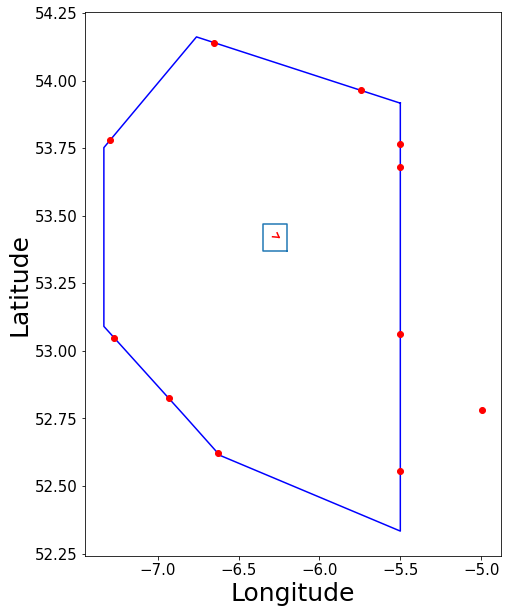

In [43]:
plot_horizontal_profile_EIDW(df3, "x", 2)

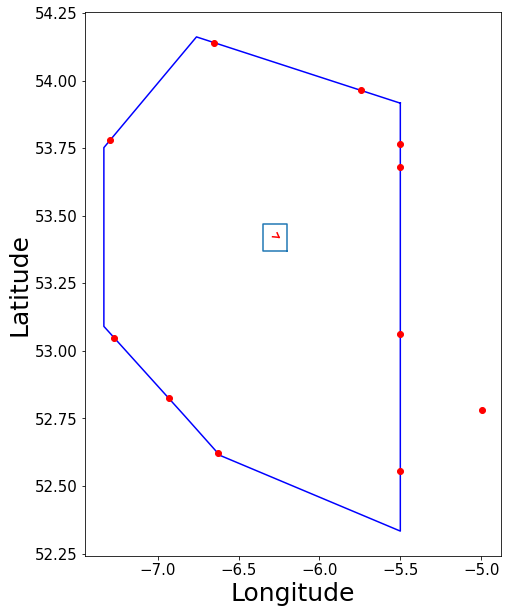

In [44]:
plot_horizontal_profile_EIDW(df4, "x", 2)

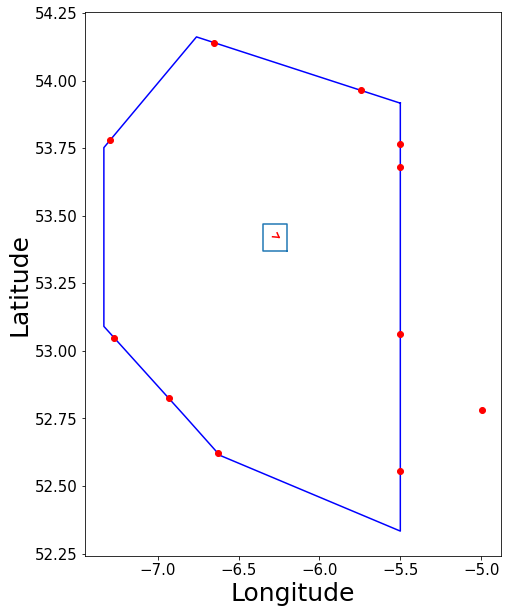

In [45]:
plot_horizontal_profile_EIDW(df5, "x", 2)

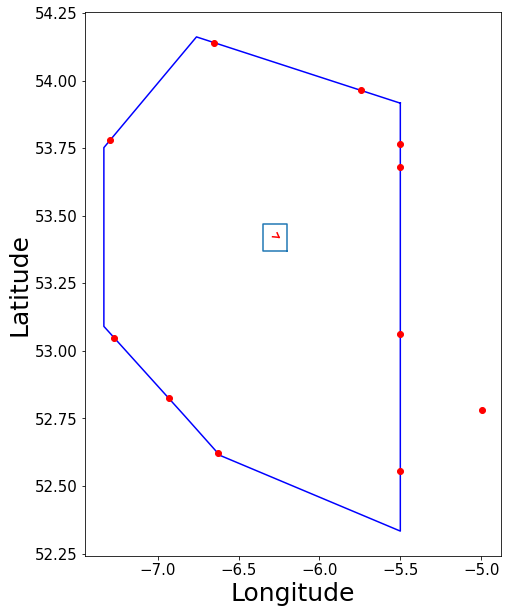

In [46]:
plot_horizontal_profile_EIDW(df6, "x", 2)

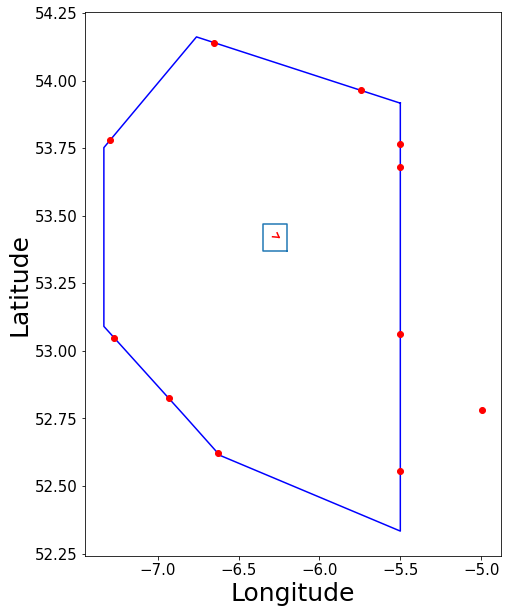

In [47]:
plot_horizontal_profile_EIDW(df7, "x", 2)

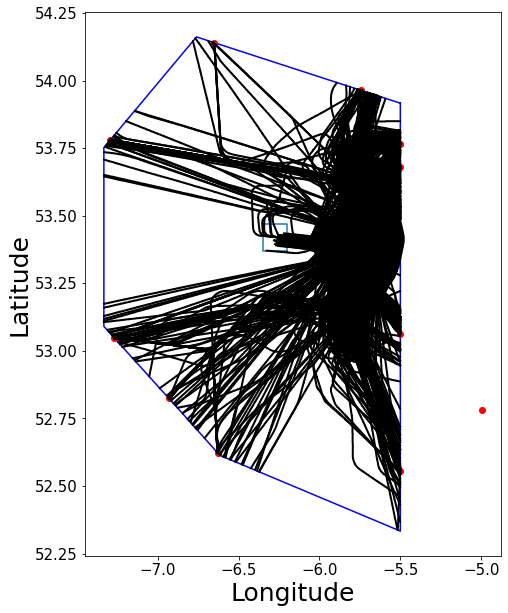

In [39]:
plot_horizontal_profile_EIDW(week1_rwy28_df, "x", 2)

In [ ]:
plot_horizontal_profile_EIDW(week2_rwy28_df, "x", 2)

In [ ]:
plot_horizontal_profile_EIDW(week3_rwy28_df, "x", 2)

In [ ]:
plot_horizontal_profile_EIDW(week4_rwy28_df, "x", 2)

In [ ]:
'''rwy28L_lon=[-6.250578, -6.290075];
rwy28L_lat=[53.42026, 53.42243];

#rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
#rwy28L_around_lat=[53.415, 53.427, 53.427, 53.415, 53.415];

rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
rwy28L_around_lat=[53.37, 53.47, 53.47, 53.37, 53.37];

def check_rwy_contains_point(point):

    lons_lats_vect = np.column_stack((rwy28L_around_lon, rwy28L_around_lat)) # Reshape coordinates
    polygon = Polygon(lons_lats_vect) # create polygon

    return polygon.contains(point)

count = 0
for flight_id, flight_id_group in horizontal_PIs_df.groupby(level='flight_id'):
    if flight_id_group['runway'].values == "28L":
        # check if last point near the runway    
        last_lat = EIDW_states_2019_10_week1_df.loc[flight_id][['lat']].values[-1]
        last_lon = EIDW_states_2019_10_week1_df.loc[flight_id][['lon']].values[-1]
        
        if (not check_rwy_contains_point(Point(last_lon, last_lat))):
            count = count + 1
            print(flight_id, last_lat, last_lon)
print(count)'''

In [26]:
#min = horizontal_PIs_df['TMA_additional_distance'].min()
#temp_df = horizontal_PIs_df[horizontal_PIs_df['TMA_additional_distance']==min]
#print(temp_df)

In [27]:
#median_add_distance = horizontal_PIs_df['TMA_additional_distance'].median()
#mean_add_distance = horizontal_PIs_df['TMA_additional_distance'].mean()
#print(median_add_distance)
#print(mean_add_distance)

In [19]:
df = EIDW_states_2019_10_week1_df
#df = df.drop("")
#filename = "../data/EIDW/2019/osn_EIDW_states_TMA_after_filtering_2019/osn_EIDW_states_TMA_2019_10_week1.csv"
#df.to_csv(filename, sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)

In [ ]:
#temp_PIs_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='28L')]
#min = temp_PIs_df['TMA_additional_distance'].min()
#temp_PIs_df = temp_PIs_df[temp_PIs_df['TMA_additional_distance']==min]
#print(temp_PIs_df)

In [ ]:
#temp_PIs_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='28L')]
#min = temp_PIs_df['TMA_additional_distance'].min()
#temp_PIs_df = temp_PIs_df[temp_PIs_df['TMA_additional_distance']==min]
#print(temp_PIs_df)

temp_df = horizontal_PIs_df
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("NIMAT")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='NIMAT')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='NIMAT')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='NIMAT')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='NIMAT')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("BOYNE")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BOYNE')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BOYNE')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BOYNE')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BOYNE')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("BAGSO")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("LIPGO")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("ABLIN")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='ABLIN')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='ABLIN')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='ABLIN')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='ABLIN')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("VATRY")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='VATRY')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='VATRY')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='VATRY')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='VATRY')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("BAMLI")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAMLI')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAMLI')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAMLI')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAMLI')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("OLAPO")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OLAPO')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OLAPO')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OLAPO')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OLAPO')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("OSGAR")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OSGAR')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OSGAR')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OSGAR')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OSGAR')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("SUTEX")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='SUTEX')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='SUTEX')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='SUTEX')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='SUTEX')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("BUNED")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BUNED')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BUNED')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BUNED')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BUNED')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

In [ ]:
#print(BUNED_rwy34_df)

In [ ]:
#num_of_flights = 0 if rwy10L_df.empty else len(rwy10L_df.groupby(level='flight_id'))
#print(num_of_flights) # 199
#num_of_flights = 0 if rwy28R_df.empty else len(rwy28R_df.groupby(level='flight_id'))
#print(num_of_flights) # 
#num_of_flights = 0 if rwy16_df.empty else len(rwy16_df.groupby(level='flight_id'))
#print(num_of_flights) # 114
#num_of_flights = 0 if rwy34_df.empty else len(rwy34_df.groupby(level='flight_id'))
#print(num_of_flights) # 

# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
plot_horizontal_profile_EIDW(NIMAT_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(BOYNE_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(BAGSO_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(LIPGO_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(ABLIN_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(VATRY_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(BAMLI_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(OLAPO_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(OSGAR_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(SUTEX_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(BUNED_rwy16_df, "x", 2)

# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
plot_horizontal_profile_EIDW(NIMAT_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(BOYNE_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(BAGSO_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(LIPGO_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(ABLIN_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(VATRY_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(BAMLI_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(OLAPO_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(OSGAR_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(SUTEX_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(BUNED_rwy10L_df, "x", 2)

# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
plot_horizontal_profile_EIDW(NIMAT_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(BOYNE_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(BAGSO_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(LIPGO_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(ABLIN_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(VATRY_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(BAMLI_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(OLAPO_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(OSGAR_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(SUTEX_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(BUNED_rwy28R_df, "x", 2)

# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
plot_horizontal_profile_EIDW(NIMAT_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(BOYNE_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(BAGSO_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(LIPGO_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(ABLIN_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(VATRY_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(BAMLI_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(OLAPO_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(OSGAR_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(SUTEX_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(BUNED_rwy34_df, "x", 2)

In [ ]:
# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"

In [ ]:
plot_vertical_profile(df, 0, 2)

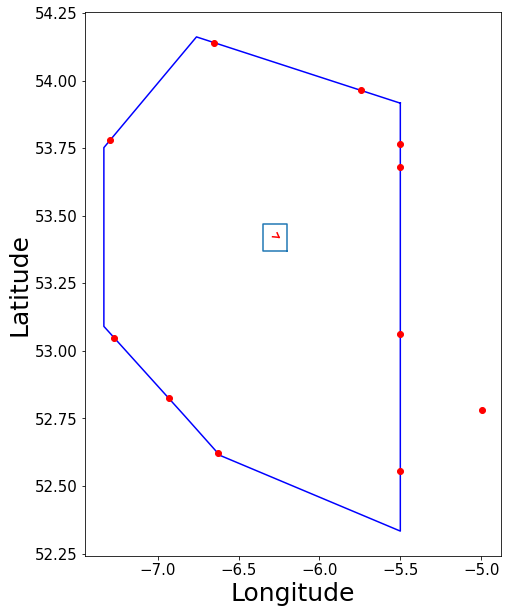

In [25]:
flight_df = df[df.index.get_level_values('flight_id') == '191001EIN1TC']
#flight_df.to_csv("temp.csv")
#plot_vertical_profile(flight_df, 0, 2)
plot_raw_vertical_profile(flight_df, 0, 2)
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [34]:
def plot_lon_vs_time(flight_df):
    
    temp_df = flight_df.reset_index(drop=False)
    lons=temp_df['lon'].to_list()
    times=temp_df['sequence'].to_list()
    
    plt.plot(times, lons, color="blue")

In [ ]:
#plot_raw_vertical_profile(flight_df, 0, 2)

In [ ]:
# max TMA_time_mean
#flight_df = df.loc[['191001EIN124', '191001UAL126']]
#plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
# max TMA_time_median
#flight_df = df.loc[['191001BAW84DM', '191001CFE9765P', '191001EIN159', '191001EIN1PE', '191001EIN3GC', '191001EIN42N',
#                    '191001EIN525', '191001EIN58P', '191001EIN93T', '191001RYR4HP', '191001RYR7UJ', '191001STK265B',
#                    '191001STK31Q', '191001VLG72LD']]
#plot_horizontal_profile_EIDW(flight_df, "x", 2)

max_number_of_flights = vertical_PIs_by_hour_df['number_of_flights'].max()
print(max_number_of_flights)
#print(vertical_PIs_by_hour_df[vertical_PIs_by_hour_df['number_of_flights']==max_number_of_flights])
date = 191001
hour = 21
flights_df = vertical_PIs_by_flight_df[(vertical_PIs_by_flight_df['date']==191001) & (vertical_PIs_by_flight_df['hour']==21)]
#print(flights_df.head())
ids = flights_df['flight_id'].to_list()
print(ids)

flight_df = df.loc[ids]
plot_horizontal_profile_EIDW(flight_df, "x", 2)

# additional distance: -29840.845 
# LIPGO: 
LIPGO_lon = -5.5000
LIPGO_lat =	53.0639
# SIVNA: 531152.3 / 0053827.7
SIVNA_lon = -5.641028
SIVNA_lat = 53.197861
# LAPMO: 532411.0 /0055644.1
LAPMO_lon = -5.945583
LAPMO_lat = 53.403056

ref_traj_lon = [LIPGO_lon, SIVNA_lon, LAPMO_lon]
ref_traj_lat = [LIPGO_lat, SIVNA_lat, LAPMO_lat]

descent_end_altitude = 2500
descent_end_altitude = descent_end_altitude / 3.281 # feet to meters
print(descent_end_altitude)

flight_df = df[df.index.get_level_values('flight_id') == '191003EIN183']
flight_df = flight_df[flight_df['altitude']>descent_end_altitude]

plot_horizontal_profile_EIDW(flight_df, "x", 2)

plt.plot(ref_traj_lon, ref_traj_lat, color="red")

In [38]:
plot_vertical_profile(flight_df, 0, 2)

plot_horizontal_profile_EIDW(BAGSO_rwy28R_df, "x", 2)
temp_df = BAGSO_rwy28R_df
temp_df2 = temp_df[temp_df['lon']<-6.5]
temp_df = temp_df.drop("191001ETH502")
temp_df = temp_df.drop("191007BTI6A1")
print(temp_df2)
plot_horizontal_profile_EIDW(temp_df, "x", 2)

In [37]:
df = EIDW_states_2019_10_week1_df
flight_df = df[df.index.get_level_values('flight_id') == '191001EIN1TC']
#plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [32]:
#plot_vertical_profile(flight_df, 0, 2)
plot_raw_vertical_profile(flight_df, 0, 2)

In [36]:
#plot_lon_vs_time(flight_df)

In [ ]:
#flight_df = df[df.index.get_level_values('flight_id') == '191007BTI6A1']
#plot_horizontal_profile_EIDW(flight_df, "x", 2)